# Microsoft Movie Analysis

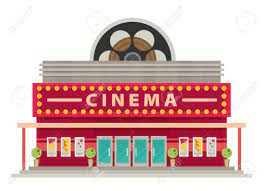

## Overview


This project will analyze cinematic data to provide Microsoft with insights into popular movie trends to help develop their burgeoning movie studio.

## Business Problem

Microsoft has decided to create their own movie studio but are unsure as to where to begin. To help guide Microsoft toward a successful studio, we will explore characteristics of the top-rated and highest grossing movies in the industry as of yet. 

## Data Understanding

Our endeavors toward this goal led us to examine datasets from The Numbers as well as two datasets from Rotten Tomatoes. We looked to The Numbers datasets for movie gross information domestically and internationally. The Rotten Tomatoes datasets yielded information on movie ratings and their corresponding genres.    

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
movie_gross = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


The Numbers dataset contains information from 1915 to 2019 on movie release dates along with their domestic and worldwide gross.

In [26]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [27]:
rt_review = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='latin1')
rt_review.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


This Rotten Tomatoes dataset contains information on movie ratings from various critics.

In [28]:
rt_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [29]:
rt_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t') 
rt_info.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


The last dataset we examined is also by Rotten Tomatoes. It has data regarding movie genres and their release date along with other miscellaneous information.


In [30]:
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


## Data Preparation

### The Numbers 

To clean the movie_gross file, we dropped unnessary columns, converted the domestic and worldwide grosses to integer values, and created two new columns entitled release_month and release_year from the release_date column in order to isolate the month and year.

In [31]:
#change domestic_gross and worldwide_gross to interger value
def gross_interger(numbers):
    new = numbers.str.replace('$','')
    return new.str.replace(',','')

In [32]:
movie_gross[['domestic_gross','worldwide_gross']] = movie_gross[
    ['domestic_gross','worldwide_gross']].apply(gross_interger).astype(int)
movie_gross.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350,149762350


In [33]:
#get month and year into their own columns 
movie_gross['release_month'] = movie_gross['release_date'].map(lambda x: x.split(' ')[0])
movie_gross['release_year'] = movie_gross['release_date'].map(lambda x: x.split(' ')[-1])
movie_gross.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625,2776345279,Dec,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875,1045663875,May,2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350,149762350,Jun,2019


In [34]:
#change release_year to interger value
movie_gross['release_year'] = movie_gross['release_year'].astype(int)

Next, we took a subset containing release years from 2000 to 2019. We chose to do this to take in the rate of inflation. From 2000 to 2021, there is approximately a $.50 difference. We saw this as negligable and did not drop too much data from our file (around 1300 rows).

In [35]:
adjusted_gross = movie_gross[movie_gross.get('release_year')>=2000]
adjusted_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625,2776345279,Dec,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875,1045663875,May,2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350,149762350,Jun,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868,1403013963,May,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382,1316721747,Dec,2017


### Rotten Tomatoes

A copy, called cleaned_df, of the rt_review file with all the null values dropped was created. A dataframe with letter ratings in the rating column was created and then used to drop the letter ratings from the cleaned_df. The ratings were reformatted into a integer in the range of 0-5 and put in a new column. 

In [36]:
#created new df without all the NaN values in rating column, dropped 13517 rows
cleaned_df = (rt_review[rt_review['rating'].notna()]).copy()

#created a new df where all the rows have a letter as the value in the rating column
df_letters = rt_review[rt_review['rating'].isin(['A+','A','A-','B+','B','B-','C+','C','C-',
                                                 'D+','D','D-','F+','F','F-','N','T','R'])].copy()

#used the letters_df to rid the letters from the no-Nan cleaned_df
cleaned_df.drop(cleaned_df[cleaned_df['rating'].isin(df_letters['rating'])].index, inplace=True)


In [37]:
#get list of string data values from rating column
values = []
for rating_value in cleaned_df['rating']:
    values.append(rating_value)

#partition and convert string values to float, interpreted the 1-5 as 1.5
to_num = []
for item in values:
    if item == '3 1/2':
        to_num.append(3.5)
    elif '/' in item:
        x = item.partition('/')
        to_num.append(float(x[0]))
    elif item == '1-5':
        to_num.append(1.5)
    else:
        to_num.append(float(item))

#rating should be 0-5 so half any ratings that are above 5, overall 3044 ratings over 5
five_rating = []
for element in to_num:
    if element > 5:
        y = element/2
        five_rating.append(y)
    else:
        five_rating.append(element)

#add new column 'cleaned_rating' w cleaned ratings   
cleaned_df['cleaned_rating'] = five_rating
cleaned_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date,cleaned_rating
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3.0
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2.0
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2.0
14,3,For those who like their Cronenberg thick and ...,3/4,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012",3.0
15,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012",3.0


#### Merging Rotten Tomatoes Datasets

We merged both Rotten Tomatoes datasets on the ID columns to get a new dataset containing information with both the movies' rating and the genres. Unnecessary columns were dropped and the genres column was reformated into individual genres with all null values dropped. 

In [38]:
w_genres_df = cleaned_df.merge(rt_info, how='left', on='id')
w_genres_df.head(3)

,id,review,rating_x,fresh,critic,top_critic,publisher,date,cleaned_rating,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [39]:
#unnecessary columns are dropped
w_genres_df.drop(labels=['critic','publisher','top_critic','rating_y',
                         'dvd_date','studio'],axis=1, inplace=True)

#made a copy of w_genres_df and dropped the rows with NaN values in genre column
filled_genres = w_genres_df.dropna(subset=['genre']).copy()

#separate the grouped genres in the genre column into individual genres
separated = []
word = ''
for genre in filled_genres['genre']:
    counter = genre.count('|') + 1
    word = genre
    while counter > 0:
        part = word.partition('|')
        separated.append(part[0])
        word = part[2]
        counter -= 1

In [40]:
#get a list of the unique genres 
distinct = set(separated)
distinct

#get boolean values for each movie for each distinct genre, will be in a list of lists
genre_by_row = []
for item in distinct:
    distinct_values = []
    for genre in filled_genres['genre']:
        if item in genre:
            distinct_values.append(True)
        else:
            distinct_values.append(False)
    genre_by_row.append(distinct_values)

In [41]:
#assign boolean values to distinct genre columns to add to filled_genre df
index = 0
for item in distinct:
    filled_genres[item] = genre_by_row[index]
    index += 1
    
filled_genres.head(3)

,id,review,rating_x,fresh,date,cleaned_rating,synopsis,genre,director,writer,...,Art House and International,Special Interest,Faith and Spirituality,Comedy,Romance,Mystery and Suspense,Cult Movies,Documentary,Drama,Kids and Family
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,"November 10, 2018",3.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,...,False,False,False,False,False,False,False,False,True,False
1,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,"April 21, 2013",2.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,...,False,False,False,False,False,False,False,False,True,False
2,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,"January 15, 2013",2.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,...,False,False,False,False,False,False,False,False,True,False


In [42]:
#function to round rates 
def rate_round(rate):
    return round(rate)

#drop superfluous columns, rename cleaned_rating to Rating, and round ratings, shape(34388,22)

filled_genres.drop(labels = ['id', 'review', 'rating_x', 'fresh', 'synopsis', 'genre', 'runtime', 'director',
                             'synopsis', 'writer', 'date', 'theater_date','currency', 'box_office'], axis=1, 
                   inplace=True)
filled_genres.rename(columns = {'cleaned_rating':'Rating'}, inplace=True)
filled_genres.Rating = filled_genres.Rating.apply(rate_round)

In [43]:
#dropped rows with television rating and then television column as only want movies, dropped 817 rows, shape(33571,21)
no_tv = filled_genres.drop(filled_genres[filled_genres['Television'] == True].index)
no_tv.dropna(subset=['Rating'], inplace=True)
no_tv.drop(labels='Television', axis=1, inplace=True)

## Analysis

From the cleaned movie_gross file, we were curious to see which months had the largest grossing movies. To do this, we grouped the movies by month and took the median gross of all the movies produced in that month from 2000-2019. The median was used because the data was very positively skewed. We then used a bar chart to plot the data.

In [45]:
#grouping by month, taking median of values and dropping extra columns 
monthly_trend = adjusted_gross.groupby('release_month').median()
monthly_trend.drop(['id','release_year'], axis=1,inplace=True)
monthly_trend.head()

,domestic_gross,worldwide_gross
release_month,,
Apr,12292413.5,22752307.5
Aug,17614417.0,30220270.0
Dec,8031955.0,24515990.0
Feb,19389454.0,39778599.0
Jan,17303424.0,32909437.0


In [46]:
#reordering columns to correct monthly order
neworder = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_trend = monthly_trend.reindex(neworder,axis=0)
monthly_trend.head()

,domestic_gross,worldwide_gross
release_month,,
Jan,17303424.0,32909437.0
Feb,19389454.0,39778599.0
Mar,15680099.0,25732334.0
Apr,12292413.5,22752307.5
May,17723145.0,35366262.5


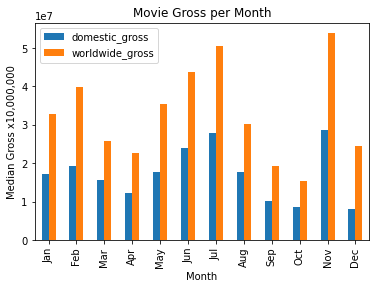

In [47]:
monthly_trend.plot(kind='bar')
plt.title('Movie Gross per Month')
plt.ylabel('Median Gross x10,000,000')
plt.xlabel('Month');

The worldwide and domestic gross fluctuate similarly between months, with February, June, July and November bringing in the highest gross. 

Grouping by year, showed us the fluctuations in the box office and allowed us to pinpoint which year sold the most tickets along with the general trend the movie industry is experiencing. 

In [50]:
yearly_trend = adjusted_gross.groupby('release_year').median()

#drop 2020 column - full of null values
yearly_trend.drop(yearly_trend.index[-1], inplace=True)
yearly_trend.drop(['id'], axis=1, inplace=True)
yearly_trend = yearly_trend.reset_index()
yearly_trend.head()

,release_year,domestic_gross,worldwide_gross
0,2000,20035310.0,32662299.0
1,2001,24375436.0,29544532.0
2,2002,18741452.0,27670436.0
3,2003,19480739.0,28920188.0
4,2004,21092751.0,36275012.5


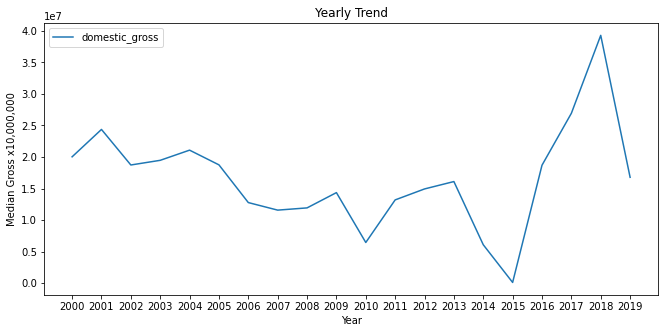

In [54]:
x_ticks = list(range(2000,2020))

yearly_trend.plot(x='release_year',y='domestic_gross', kind='line', figsize = (11,5))
plt.title('Yearly Trend')
plt.ylabel('Median Gross x10,000,000')
plt.xlabel('Year')
plt.xticks(ticks = x_ticks);

Based on the above graph, we can see that there is a general downward trend indicating that movie theaters are decreasing in popularity.

From the Rotten Tomatoes data, we decided to examine their movie ratings to see which genres were the most rated - no matter the rating - to ascertain which types of movies were most frequently watched as we hypothesize that the two are related. We subdivided the ratings into high, low, and average and then examined the genres per rate within those subsets. Lastly, we examined the top ten genres in all three subsets.

In [55]:
#df with highest ratings (4-5)
high_rate = no_tv.drop(no_tv[no_tv['Rating'] < 4.0].index)

#df with mid (3) ratings 
mid_rate = no_tv.drop(no_tv[no_tv['Rating'] < 3.0].index)
mid_rate.drop(mid_rate[mid_rate['Rating'] >= 4.0].index, inplace=True)

#df with low ratings (0-2)
low_rate = no_tv.drop(no_tv[no_tv['Rating'] >= 3].index)

Number of high ratings: 12129


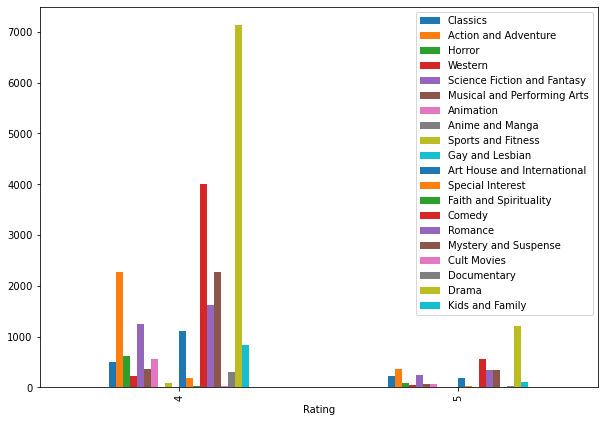

In [56]:
#plot highest ratings (4 & 5) of all genres, 11855 ratings
high_sum = high_rate.groupby(['Rating']).sum()
high_sum
print('Number of high ratings:', len(high_rate))
high_sum.plot.bar(figsize=(10,7));

Number of 4 ratings: 10448


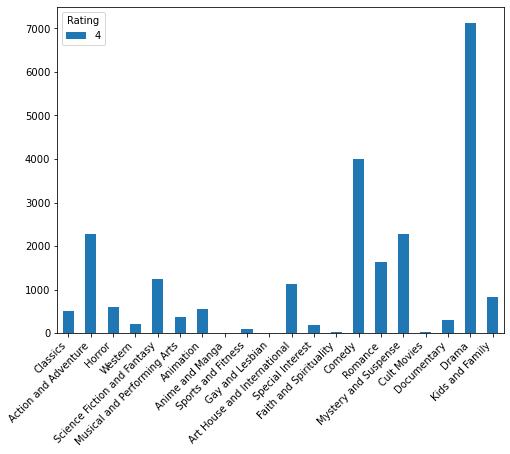

In [57]:
#create df of 4 ratings and plot
high4 = high_rate[high_rate['Rating']==4.00]
high4_sum = high4.groupby(['Rating']).sum()
print('Number of 4 ratings:',len(high4))
(high4_sum.T).plot.bar(figsize=(8,6));
plt.xticks(rotation=45, ha='right');

Number of 5 ratings: 1681


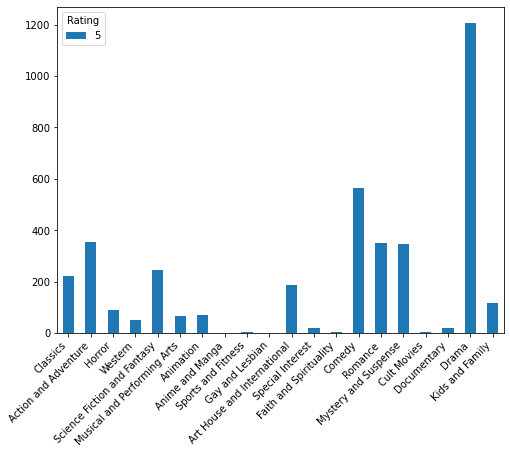

In [58]:
#create df of 5 ratings of all genres and plot
high5 = high_rate[high_rate['Rating']==5.00]
high5_sum = high5.groupby(['Rating']).sum()
print('Number of 5 ratings:', len(high5))
(high5_sum.T).plot.bar(figsize=(8,6));
plt.xticks(rotation=45, ha='right');

Number of ratings of 3: 8760


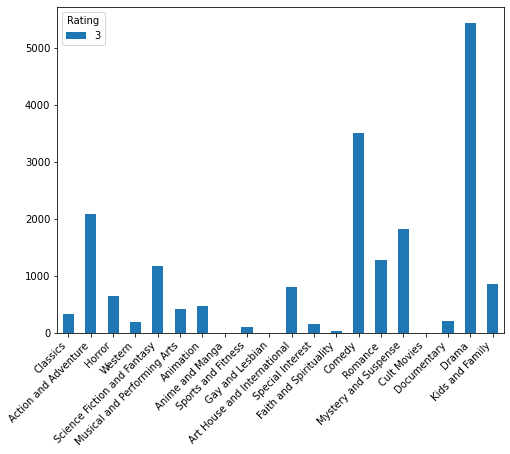

In [59]:
#create df of mid rating and plot
rate3 = mid_rate[mid_rate['Rating']==3.00]
rate3_sum = rate3.groupby(['Rating']).sum()
print('Number of ratings of 3:', len(rate3))
(rate3_sum.T).plot.bar(figsize=(8,6));
plt.xticks(rotation=45, ha='right');

Number of low ratings: 13370


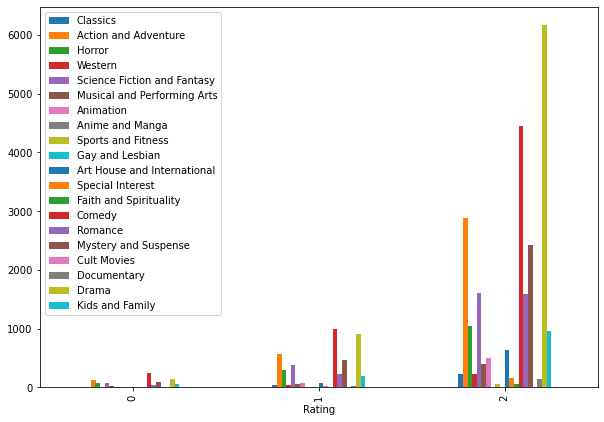

In [60]:
print('Number of low ratings:', len(low_rate))
low_rate_sum = low_rate.groupby(["Rating"]).sum()
low_rate_sum.plot.bar(figsize=(10,7));

In [61]:
#create dfs for low ratings (1,2, &3)
low0 = low_rate[low_rate['Rating']== 0]
low1 = low_rate[low_rate['Rating'] == 1]
low2 = low_rate[low_rate['Rating'] == 2]

Number of 0 ratings: 454


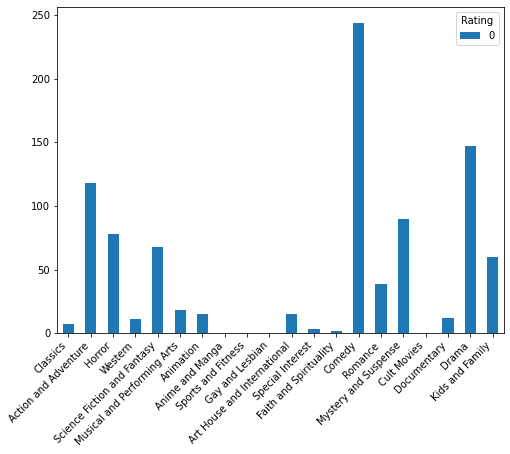

In [62]:
#create sum df of 0 ratings and plot
low0_sum = low0.groupby(['Rating']).sum()
print('Number of 0 ratings:', len(low0))
(low0_sum.T).plot.bar(figsize=(8,6));
plt.xticks(rotation=45, ha='right');

Number of 1 ratings: 2101


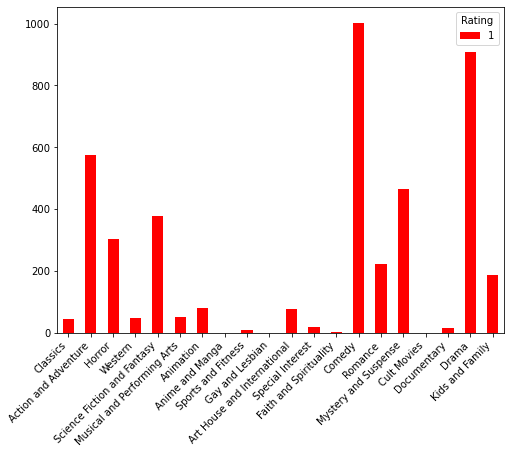

In [63]:
#create sum df of 1 ratings and plot
low1_sum = low1.groupby(['Rating']).sum()
print('Number of 1 ratings:', len(low1))
(low1_sum.T).plot.bar(figsize=(8,6), color='red');
plt.xticks(rotation=45, ha='right');

Number of 2 ratings: 10815


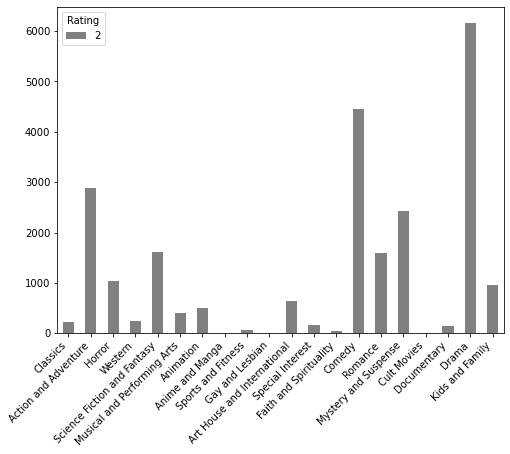

In [64]:
#create sum df of 2 ratings and plot
low2_sum = low2.groupby(['Rating']).sum()
print('Number of 2 ratings:', len(low2))
(low2_sum.T).plot.bar(figsize=(8,6), color='grey');
plt.xticks(rotation=45, ha='right');

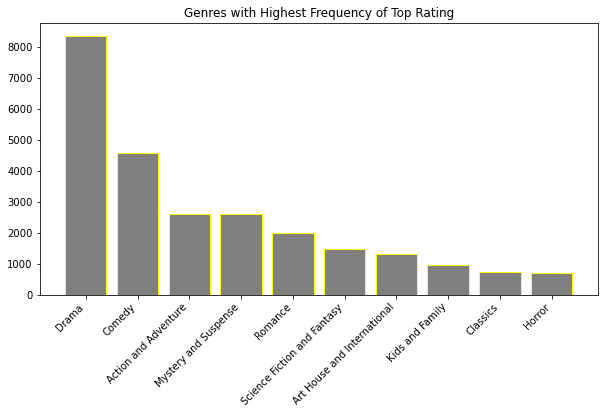

In [65]:
#create df of 10 genres with highest frequency of top rating
all_high = high_rate.copy()
all_high.Rating = all_high.Rating.apply(lambda x: 5)
all_high_sum = all_high.groupby(['Rating']).sum()
top10_high = all_high_sum.T.sort_values(by=5, ascending=False)[:10]

#plot top ten genres with highest frequency of top rating
fig, ax1 = plt.subplots(figsize=(10,5));

ax1.bar(x=top10_high.index, height=top10_high[5], color='grey', edgecolor='yellow');
plt.xticks(rotation=45, ha='right');
ax1.set_title('Genres with Highest Frequency of Top Rating');

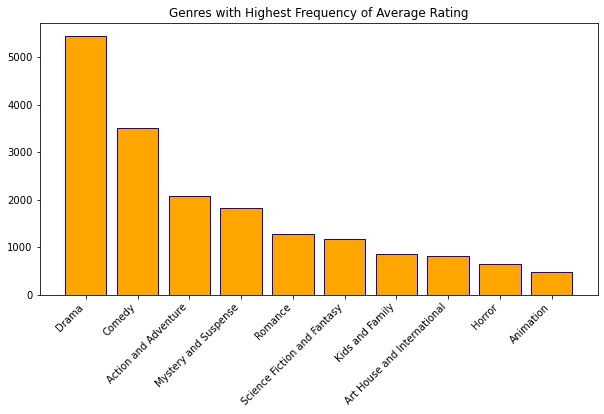

In [66]:
#create df of 10 genres of with highest frequency of average rating
all_mid_sum = mid_rate.groupby(['Rating']).sum()
top10_mid = all_mid_sum.T.sort_values(by=3, ascending=False)[:10]

#plot top ten genres with highest frequency of average rating
fig, ax2 = plt.subplots(figsize=(10,5));

ax2.bar(x=top10_mid.index, height=top10_mid[3], color='orange', edgecolor='blue');
plt.xticks(rotation=45, ha='right');
ax2.set_title('Genres with Highest Frequency of Average Rating');

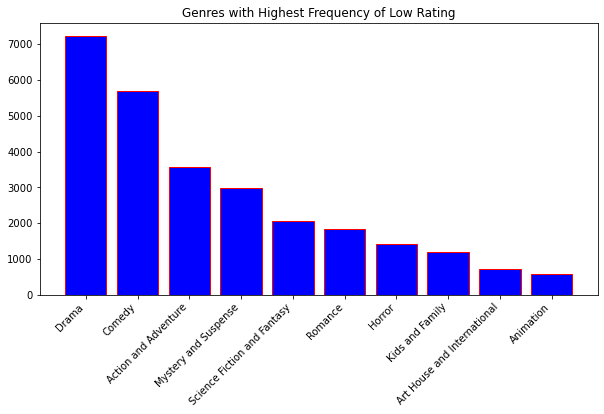

In [67]:
#create df of top 10 genres with highest frequency of low rating
all_low = low_rate.copy()
all_low.Rating = all_low.Rating.apply(lambda x : 1)
all_low_sum = all_low.groupby(['Rating']).sum()
top10_low = all_low_sum.T.sort_values(by=1, ascending=False)[:10]

#plot top ten genres with highest frequency of low rating
fig, ax = plt.subplots(figsize=(10,5));

ax.bar(x=top10_low.index, height=top10_low[1], color='blue', edgecolor='red');
plt.xticks(rotation=45, ha='right');
ax.set_title('Genres with Highest Frequency of Low Rating');

## Conclusions

Based on the analysis above, our recomendations to the head of Microsoft's movie studio are: 
* Aim to release new movies during the peak months of June, July and November to yeild higher profits.
* Consider releasing movies online/through a streaming service to reach a broader audience, since theater popularity is decreasing.
* Concentrate on films in the Drama and Comedy genres will ensure viewer turnout as well as introduce the public to the studio’s brand. 
* Creating films in the Action & Adventure, Mystery & Suspense, Romance, and Science Fiction & Fantasy genres will yield a consistent viewership as well as increase exposure of the studio.
* We recommend that Microsoft initially refrain from producing films in the Sports & Fitness, Documentary, Gay & Lesbian, Faith & Spirituality, and Cult  genres as these were the least rated movies implying that these genres are the least watched and correspondingly of least interest to viewers.

## Next Steps 

To better understand these trends, further analysis could be done on: 
* The cause of the surge in box office sales during 2017 and 2018
* The impacts of 2020 and 2021 on the movie industry
* Streaming services and how they are preforming in comparison to theaters